In [105]:
## Compare phase proportions
#
import pandas as pd

def get_mineral(database, mineral):

    names = []
    for ii, each in enumerate(range(21)):
        names.append('dummy%d' % ii)

    names[0] = 'P'
    names[1] = 'T'
    names[2] = 'Opx'
    names[3] = 'Pl'
    names[4] = 'O'

    df = pd.read_csv('%s/%s_2.tab' % (database,database), skiprows=12, delim_whitespace=True)

    df.rename(columns = {'P(bar)':'P'}, inplace = True)
    df.rename(columns = {'T(K)':'T'}, inplace = True)
    df.rename(columns = {'Opx(HP)':'Opx'}, inplace = True)
    df.rename(columns = {'O(HP)':'O'}, inplace = True)
    df.rename(columns = {'Cpx(HP)':'Cpx'}, inplace = True)
    df.rename(columns = {'Gt(HP)':'Gt'}, inplace = True)
    
    df.P = df.P/10000.
    
    df = df.query("T > 1600").query("T < 1620")
    
    return df.P.tolist(), df[mineral].tolist()


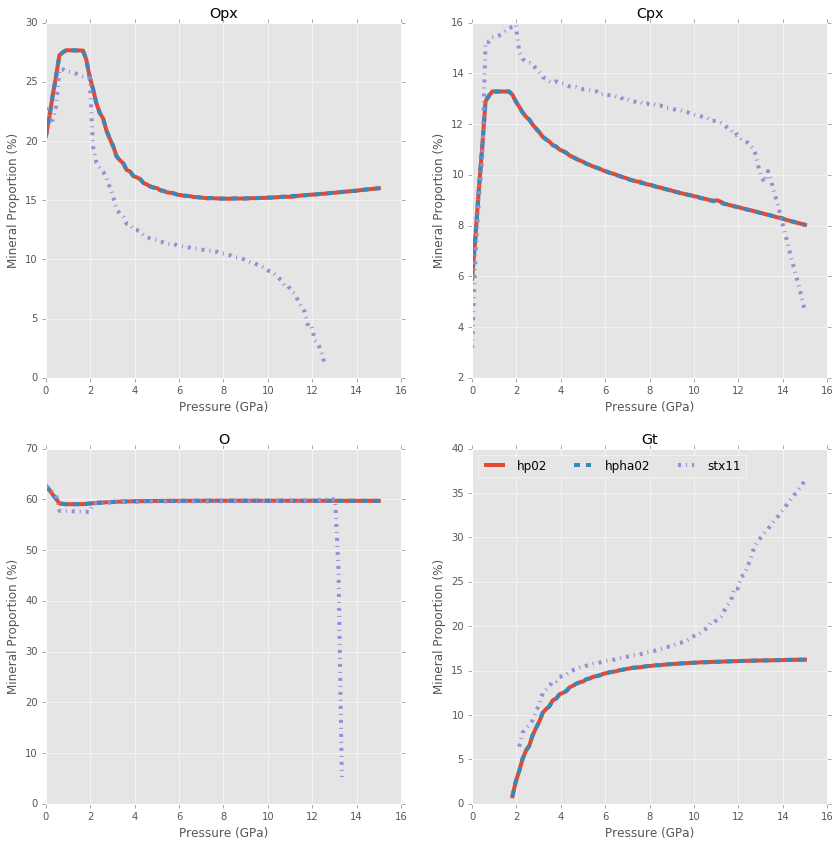

In [106]:
from matplotlib import pylab as plt
plt.style.use('ggplot')
%matplotlib inline

plt.figure(1,(14,14))

for iplt, mineral in enumerate(["Opx","Cpx","O","Gt"]):
    plt.subplot(2,2,iplt+1)
    p, proportion = get_mineral('peridotite_hp02',mineral) 
    plt.plot(p,proportion,'-',  lw=4, label = 'hp02')
    p, proportion = get_mineral('peridotite_hpha02',mineral) 
    plt.plot(p,proportion,'--', lw=4, label='hpha02')
    plt.title(mineral)
    p, proportion = get_mineral('peridotite_stx11',mineral) 
    plt.plot(p,proportion,'-.', lw=4, label='stx11')
    plt.xlim(0,16)
    
    plt.ylabel('Mineral Proportion (%)')
    plt.xlabel('Pressure (GPa)')
    
plt.legend(fontsize=12, loc =2, ncol=3)
    
#plt.figure()
#p, proportion = get_mineral('peridotite_stx11','Wad') 
#plt.plot(p,proportion,'-.', lw=4)
#plt.title('Wad')
#plt.xlim(0,16)

In [98]:
def get_mineral_velocities(database):

    names = []
    for ii, each in enumerate(range(21)):
        names.append('dummy%d' % ii)

    names[0] = 'P'
    names[1] = 'T'
    names[2] = 'Opx'
    names[3] = 'Pl'
    names[4] = 'O'

    df = pd.read_csv('%s/%s_1.phm' % (database,database), skiprows=12, delim_whitespace=True)

    df.rename(columns = {'P(bar)':'P'}, inplace = True)
    df.rename(columns = {'T(K)':'T'}, inplace = True)
    df.rename(columns = {'vs,km/s':'vs'}, inplace = True)

    df = df.query("T == 800 and P > 10000")
    return df[["Name","P","vs"]]

df1 = get_mineral_velocities('peridotite_hp02').query('Name == "Gt(HP)"').reset_index()
df2 = get_mineral_velocities('peridotite_hpha02').query('Name == "Opx(HP)"').reset_index()
df3 = get_mineral_velocities('peridotite_stx11').query('Name == "Opx"').reset_index()

pd.concat([df1, df2, df3], axis=1, join='outer')

,index,Name,P,vs,index,Name,P,vs,index,Name,P,vs
0,48,Gt(HP),12130.4,4.95188,40.0,Opx(HP),10615.4,4.62100,43.0,Opx,10615.4,4.61648
1,53,Gt(HP),13645.5,4.96161,45.0,Opx(HP),12130.4,4.63277,48.0,Opx,12130.4,4.62000
2,58,Gt(HP),15160.5,4.96425,51.0,Opx(HP),13645.5,4.64959,53.0,Opx,13645.5,4.62525
3,63,Gt(HP),16675.6,4.96742,56.0,Opx(HP),15160.5,4.65721,58.0,Opx,15160.5,4.63072
4,68,Gt(HP),18190.6,4.97060,61.0,Opx(HP),16675.6,4.66369,63.0,Opx,16675.6,4.63685
5,73,Gt(HP),19705.7,4.97380,66.0,Opx(HP),18190.6,4.67019,68.0,Opx,18190.6,4.64100
6,78,Gt(HP),21220.7,4.97627,71.0,Opx(HP),19705.7,4.67671,73.0,Opx,19705.7,4.64309
7,83,Gt(HP),22735.8,4.98027,76.0,Opx(HP),21220.7,4.68344,78.0,Opx,21220.7,4.64779
8,88,Gt(HP),24250.8,4.98297,81.0,Opx(HP),22735.8,4.68977,83.0,Opx,22735.8,4.65620
9,93,Gt(HP),25765.9,4.98556,86.0,Opx(HP),24250.8,4.69664,88.0,Opx,24250.8,4.66043


In [107]:
(4.59-4.48)/4.59

0.023965141612200314